In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [22]:
df= pd.read_csv('BostonHousing.csv')

In [23]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [24]:
df.head

<bound method NDFrame.head of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90 

In [25]:
df.isnull

<bound method DataFrame.isnull of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396

In [26]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [27]:
#split features and target variable
X= df.drop('medv',axis=1).values
Y= df['medv'].values

In [28]:
#standardise the dataset
scaler= StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
#define the model
model = Sequential([
    Dense(128, activation ='relu', input_shape=(X_scaled.shape[1],)),
    Dense(64, activation ='relu'),
    Dense(1 , activation = 'linear')
])

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
#compile the model
model.compile(optimizer = 'adam' , loss ='mean_squared_error')

In [31]:
# train the model
model.fit(X_scaled, Y, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - loss: 567.3126
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step - loss: 436.9246
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 429us/step - loss: 250.7826
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 345us/step - loss: 119.5285
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 355us/step - loss: 54.0764
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 357us/step - loss: 32.2419
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - loss: 26.1834
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 335us/step - loss: 19.7572
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 320us/step - loss: 22.9385
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 19.1915
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 17.1564
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step - loss: 15.2375
Epoch 13/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - loss: 15.1728
Epoch 14/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 319us/step - loss: 17.6402
Epoch 15/100
16/16 ━━━━━━

In [32]:
# prediction using the trained model
predicitions = model.predict(X_scaled)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step


In [37]:
#mean squared error
mse = mean_squared_error(Y, predicitions)
print("\nMean Squared Error:",mse)


Mean Squared Error: 5.117312773500449


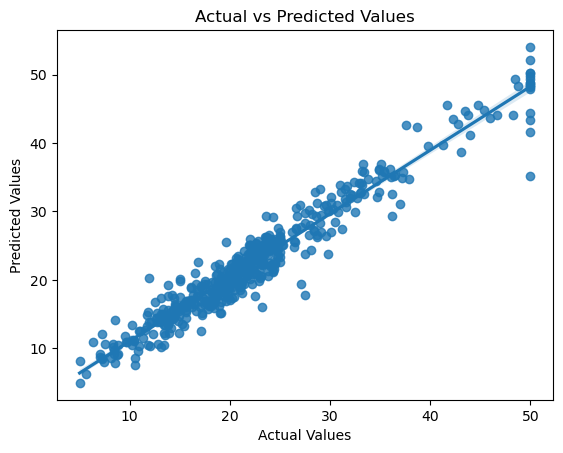

In [41]:
sns.regplot(x=Y , y =predicitions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()